In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [2]:
######################################################################################################
# Read in raw test and train data
######################################################################################################
 
with open(r"C:\Users\hfallah\pizza\train.json",'r') as m_file:
    data_train = json.load(m_file)

data_frame = pd.DataFrame(data_train)

with open(r"C:\Users\hfallah\pizza\test.json",'r') as m_file:
    data_test = json.load(m_file)

data_frame_train_ = pd.DataFrame(data_train)
data_frame_test = pd.DataFrame(data_test)

data_frame_tr_label = data_frame_train_[['requester_received_pizza']]

data_frame_train = data_frame_train_[['number_of_downvotes_of_request_at_retrieval', 'number_of_upvotes_of_request_at_retrieval',
                                        'post_was_edited', 'request_number_of_comments_at_retrieval', 'requester_account_age_in_days_at_request',
                                        'requester_account_age_in_days_at_retrieval', 'requester_days_since_first_post_on_raop_at_request',
                                        'requester_days_since_first_post_on_raop_at_retrieval', 'requester_number_of_comments_at_request',
                                        'requester_number_of_comments_at_retrieval', 'requester_number_of_comments_in_raop_at_request',
                                        'requester_number_of_comments_in_raop_at_retrieval', 'requester_number_of_posts_at_request',
                                        'requester_number_of_posts_at_retrieval', 'requester_number_of_posts_on_raop_at_request',
                                        'requester_number_of_posts_on_raop_at_retrieval', 'requester_number_of_subreddits_at_request',
                                        'requester_upvotes_minus_downvotes_at_request', 'requester_upvotes_minus_downvotes_at_retrieval',
                                        'requester_upvotes_plus_downvotes_at_request', 'requester_upvotes_plus_downvotes_at_retrieval','request_text',
                                        'requester_username']]

data_frame_train['post_was_edited'] = data_frame_train['post_was_edited'].apply(lambda x: False if (x > 1 and x != 0) else x)


Train, Test, Label_Train, Label_Test = train_test_split(
    data_frame_train, data_frame_tr_label, train_size = 0.75)


C:\Users\hfallah\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\hfallah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [3]:
######################################################################################################
# Model 1 - For data with numeric variables - Use logistic regression
######################################################################################################

#Numeric only data
data_frame_numericsTr = Train[['number_of_downvotes_of_request_at_retrieval', 'number_of_upvotes_of_request_at_retrieval',
                                        'post_was_edited', 'request_number_of_comments_at_retrieval', 'requester_account_age_in_days_at_request',
                                        'requester_account_age_in_days_at_retrieval', 'requester_days_since_first_post_on_raop_at_request',
                                        'requester_days_since_first_post_on_raop_at_retrieval', 'requester_number_of_comments_at_request',
                                        'requester_number_of_comments_at_retrieval', 'requester_number_of_comments_in_raop_at_request',
                                        'requester_number_of_comments_in_raop_at_retrieval', 'requester_number_of_posts_at_request',
                                        'requester_number_of_posts_at_retrieval', 'requester_number_of_posts_on_raop_at_request',
                                        'requester_number_of_posts_on_raop_at_retrieval', 'requester_number_of_subreddits_at_request',
                                        'requester_upvotes_minus_downvotes_at_request', 'requester_upvotes_minus_downvotes_at_retrieval',
                                        'requester_upvotes_plus_downvotes_at_request', 'requester_upvotes_plus_downvotes_at_retrieval']].set_index(Train.requester_username)
data_frame_numericsTe = Test[['number_of_downvotes_of_request_at_retrieval', 'number_of_upvotes_of_request_at_retrieval',
                                        'post_was_edited', 'request_number_of_comments_at_retrieval', 'requester_account_age_in_days_at_request',
                                        'requester_account_age_in_days_at_retrieval', 'requester_days_since_first_post_on_raop_at_request',
                                        'requester_days_since_first_post_on_raop_at_retrieval', 'requester_number_of_comments_at_request',
                                        'requester_number_of_comments_at_retrieval', 'requester_number_of_comments_in_raop_at_request',
                                        'requester_number_of_comments_in_raop_at_retrieval', 'requester_number_of_posts_at_request',
                                        'requester_number_of_posts_at_retrieval', 'requester_number_of_posts_on_raop_at_request',
                                        'requester_number_of_posts_on_raop_at_retrieval', 'requester_number_of_subreddits_at_request',
                                        'requester_upvotes_minus_downvotes_at_request', 'requester_upvotes_minus_downvotes_at_retrieval',
                                        'requester_upvotes_plus_downvotes_at_request', 'requester_upvotes_plus_downvotes_at_retrieval']].set_index(Test.requester_username)

Label_Train_n_tr = Label_Train.set_index(data_frame_numericsTr.index)

Label_Test_n_te = Label_Test.set_index(data_frame_numericsTe.index)

In [4]:
#Find optimal c parameter
lr = LogisticRegression(penalty='l2')
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5,3.0,3.5,4.0]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)


random_result = random.fit(data_frame_numericsTr, Label_Train_n_tr)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

C:\Users\hfallah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.846535 using {'max_iter': 140, 'dual': False, 'C': 2.0}


In [8]:
final_model = LogisticRegression(C=2.0, max_iter=140, dual=False)
final_model.fit(data_frame_numericsTr, Label_Train_n_tr)
print ("Final Accuracy: %s" 
       % accuracy_score(Label_Test_n_te, final_model.predict(data_frame_numericsTe)))
# Final Accuracy: 0.80

C:\Users\hfallah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final Accuracy: 0.79900990099


In [9]:
#Precision Recall
print(classification_report(Label_Test_n_te, final_model.predict(data_frame_numericsTe), digits=4))

             precision    recall  f1-score   support

      False     0.8241    0.9332    0.8752       763
       True     0.6507    0.3846    0.4835       247

avg / total     0.7817    0.7990    0.7794      1010



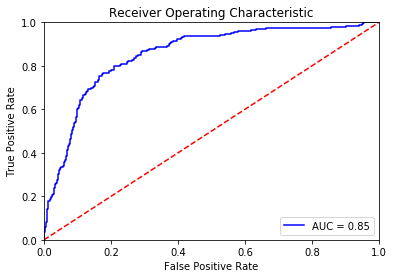

In [11]:
# Compute ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = final_model.predict_proba(data_frame_numericsTe)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Label_Test_n_te, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [12]:
######################################################################################################
# Model 2 - Text Model
######################################################################################################

#Look at text variables
data_frame_text_tr = Train[['request_text']].set_index(Train.requester_username)
data_frame_text_te = Test[['request_text']].set_index(Test.requester_username)

Label_Train_t_tr = Label_Train.set_index(data_frame_text_tr.index)
Label_Test_t_te = Label_Test.set_index(data_frame_text_te.index)

#cleaning text
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

sw = list(set(stopwords.words('english')))
sw = [REPLACE_NO_SPACE.sub("", line) for line in sw]
sw = [REPLACE_WITH_SPACE.sub(" ", line) for line in sw]
sw=str(sw)


def word_extraction(sentence):
    words = re.sub("[^\w]", " ",  sentence).split()
    cleaned_text = [w.lower() for w in words if w not in sw]
    return cleaned_text


def preprocess_reviews(reviews):
    reviews = [re.sub("\d", "", line) for line in reviews]
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    reviews = [word_extraction(line) for line in reviews]
    reviews = [line[1:] for line in reviews]
    return reviews


reviews_train_clean = preprocess_reviews(data_frame_text_tr.request_text)
reviews_test_clean = preprocess_reviews(data_frame_text_te.request_text)

In [43]:
#Vectorize text.
matrix = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
matrix.fit(reviews_train_clean)
Train_Text2 = pd.DataFrame(matrix.transform(reviews_train_clean).toarray(), columns=matrix.get_feature_names()).set_index(data_frame_text_tr.index)


matrix.fit(reviews_test_clean)
Test_Text2 = pd.DataFrame(matrix.transform(reviews_test_clean).toarray(), columns=matrix.get_feature_names()).set_index(data_frame_text_te.index)

Positive_Pizza_Requests = preprocess_reviews(data_frame_train_.request_text[data_frame_train_.requester_received_pizza==True])
matrix.fit(Positive_Pizza_Requests)
Positive_Pizza_Requests = pd.DataFrame(matrix.transform(Positive_Pizza_Requests).toarray(), columns=matrix.get_feature_names()).set_index(data_frame_train_.requester_username[data_frame_train_.requester_received_pizza==True])



Train_Text2 = Train_Text2.join(Label_Train_t_tr.set_index(data_frame_text_tr.index))
Test_Text2 = Test_Text2.join(Label_Test_t_te.set_index(data_frame_text_te.index))

maxColsTrain = len(Train_Text2.columns)
maxColsTest = len(Test_Text2.columns)
for word in Train_Text2.columns[0:maxColsTrain-1]:
    if word not in Positive_Pizza_Requests.columns:
        del Train_Text2[word]
for word in Test_Text2.columns[0:maxColsTest-1]:
    if word not in Train_Text2.columns:
        del Test_Text2[word]
for word in Train_Text2.columns[0:maxColsTest-1]:
    if word not in Test_Text2.columns:
        Test_Text2[word] = 0

Train_Text2_ = Train_Text2
Test_Text2_ = Test_Text2

In [16]:
######################################################################################################
# Model 2 - Medthod 1- Frequency Counts
######################################################################################################

#Frequency of words of successes
counts_dataset = pd.DataFrame(columns = ["Column","LenWord","StemWord"])

#stem words
ps = PorterStemmer()

for col in list(Train_Text2.columns.values):
    Column = col
    Stem = ps.stem(col)
    LenWord = len(col)
    df = pd.DataFrame({'Column': Column,'LenWord': LenWord, 'StemWord': Stem}, index=[col])
    counts_dataset = counts_dataset.append(df)

counts_dataset = counts_dataset.set_index('StemWord')
counts_dataset["StemWord"] = counts_dataset.index
counts_dataset["Freq"] = counts_dataset.index.value_counts()
counts_dataset = counts_dataset.set_index('Column')
counts_dataset["Column"] = counts_dataset.index

#If word is 3 letters or less, then remove. Remove too infrequent counts.
keep_vars = counts_dataset[counts_dataset.LenWord > 2]
keep_vars = keep_vars[keep_vars.Freq > 1]

#Dictionary of column and stemword
Dict_Vars={}
for index, row in keep_vars.iterrows():
    Dict_Vars[row['Column']] = row['StemWord']

#Keep pertinent columns. Rename column to stem word. Then add up columns of the same stem word and keep unique column names
Train_Text2 = Train_Text2[keep_vars['Column']]
Train_Text2 = Train_Text2.rename(columns=Dict_Vars)
Train_Text2 = Train_Text2.groupby(Train_Text2.columns, axis=1).sum()

Test_Text2 = Test_Text2[keep_vars['Column']]
Test_Text2 = Test_Text2.rename(columns=Dict_Vars)
Test_Text2 = Test_Text2.groupby(Test_Text2.columns, axis=1).sum()

In [17]:
#Multinomial naive bayes
clf = MultinomialNB()
clf.fit(Train_Text2, Label_Train_t_tr)
print ("Final Accuracy: %s" 
       % accuracy_score(Label_Test_t_te, clf.predict(Test_Text2)))
# Final Accuracy: 0.73

Final Accuracy: 0.729702970297


C:\Users\hfallah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


             precision    recall  f1-score   support

      False     0.7652    0.9266    0.8382       763
       True     0.3488    0.1215    0.1802       247

avg / total     0.6633    0.7297    0.6773      1010



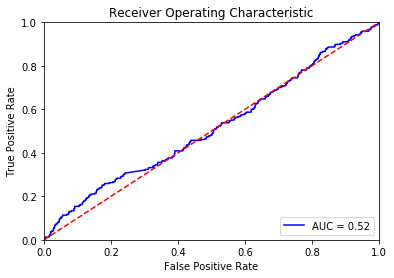

In [18]:
#Precision Recall
print(classification_report(Label_Test_t_te, clf.predict(Test_Text2), digits=4))

# Compute ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(Test_Text2)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Label_Test_t_te, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
######################################################################################################
# Model 2 - Medthod 2- Chi Square Feature Selection
######################################################################################################

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfTabular = None
        self.dfExpected = None

    def _print_chisquare_result(self, colX, alpha):
        if self.p<alpha:
            colX
        #else:
        #    result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        #print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 

        #print(p)
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        if p < alpha:
            return colX
        else:
            return None
        

#Feature Selection
list_words=[]
maxColsTrain = len(Train_Text2_.columns)
cT = ChiSquare(Train_Text2_)
list_words = []
for var in Train_Text2_.columns[0:maxColsTrain-1]:
    word = cT.TestIndependence(colX=var,colY="requester_received_pizza" )
    if word is not None:
        print(word)
        list_words.append(word)
        
Train_Text3=pd.DataFrame()
Test_Text3=pd.DataFrame()
for var in Train_Text2_.columns:
    if var in list_words:
            Train_Text3[var] = Train_Text2_[var]
for var in Test_Text2_.columns:
    if var in Train_Text3.columns:
            Test_Text3[var] = Test_Text2_[var]
for var in Train_Text3.columns:
    if var not in Test_Text3.columns:
            Test_Text3[var] = 0

able
accident
acct
additionally
admit
aid
always
amazing
anniversary
anyone
anyones
apartment
applied
ask
asking
awhile
babies
back
bad
basic
battery
battle
beans
bill
bills
bonus
borrowing
breaks
bucks
called
cant
car
cheap
check
checks
cheer
christmas
collect
con
considering
constantly
corporate
corporation
couch
cover
cups
currently
cute
damages
days
dealership
details
disability
distance
dog
dominos
doubled
drop
earned
easier
edit
enjoying
especially
even
everyone
evicted
exchange
eye
facility
fair
fantasy
father
fed
feel
feet
fill
filling
finals
financial
financially
flat
fold
food
forever
forward
fridge
fulfilled
future
generosity
get
gift
girl
goodness
got
grad
graveyard
guests
heat
hed
help
helping
hit
hospital
however
http
iimgurcom
imgurcom
imgurhttp
include
instant
interactive
itd
item
ive
january
job
johns
keep
kids
kinda
laid
landlord
landlords
last
lawyer
learned
leftover
life
lift
like
living
local
long
loves
lurking
mac
make
making
meal
meals
medical
meets
mention
menti

In [45]:
#Multinomial naive bayes
clf = MultinomialNB()
clf.fit(Train_Text3, Label_Train_t_tr)
print ("Final Accuracy: %s" 
       % accuracy_score(Label_Test_t_te, clf.predict(Test_Text3)))
# Final Accuracy: 0.39

Final Accuracy: 0.385148514851


C:\Users\hfallah\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
#Precision Recall
print(classification_report(Label_Test_t_te, clf.predict(Test_Text3), digits=4))

             precision    recall  f1-score   support

      False     0.8349    0.2320    0.3631       763
       True     0.2657    0.8583    0.4057       247

avg / total     0.6957    0.3851    0.3735      1010



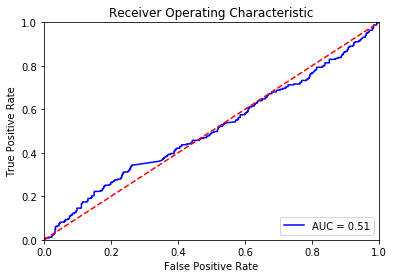

In [42]:
# Compute ROC curve 
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(Test_Text3)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Label_Test_t_te, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()